# Imports

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from hri_tools import HumorDataset
from hri_tools import SUPPORTED_DATASETS, HRI_PAPER_2023_DATASETS
from hri_tools import download
from hri_tools import calc_divergence
from hri_tools import calc_divergence_between_target
from hri_tools import calc_vocab_for_labels

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import copy

# Download datasets

In [6]:
%env HRI_URL=###PASTE HERE###
%env HRI_PASSWORD=###PASTE HERE###

env: HRI_URL=###PASTE HERE###
env: HRI_PASSWORD=###PASTE HERE###


In [7]:
# download()

# Load datasets and get statistics

In [8]:
print(SUPPORTED_DATASETS)

['funlines_and_human_microedit_paper_2023', 'funlines_v1', 'funlines_v2', 'human_microedit_v1', 'human_microedit_v2', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


In [9]:
print(HRI_PAPER_2023_DATASETS)

['funlines_and_human_microedit_paper_2023', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


In [10]:
all_data = list()
for name in SUPPORTED_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

In [10]:
for i in range(len(all_data)):
    all_data[i].calc_statistics()

for i in range(len(all_data)):
    all_data[i].print_statistics_report()


        Statistics report for funlines_and_human_microedit_paper_2023 dataset:
        Number of samples: 23629, pos - 13461, neg - 10168.
        Mean word length is 12.554149561978925
        Mean length by symbols is 71.7300774472047 (without space is 59.78505226628296)
        

        Statistics report for funlines_v1 dataset:
        Number of samples: 15731, pos - 8248, neg - 7483.
        Mean word length is 12.731803445426229
        Mean length by symbols is 73.31803445426229 (without space is 61.249125929692966)
        

        Statistics report for funlines_v2 dataset:
        Number of samples: 9427, pos - 1944, neg - 7483.
        Mean word length is 12.772886390155936
        Mean length by symbols is 73.30720271560412 (without space is 61.39089848308051)
        

        Statistics report for human_microedit_v1 dataset:
        Number of samples: 22282, pos - 15085, neg - 7197.
        Mean word length is 12.369580827573827
        Mean length by symbols is 70.2818

In [11]:
# for i in range(len(all_data)):
#     all_data[i].print_positive_sample()

# Working with vocab

In [11]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

for i in range(len(all_data)):
    all_data[i].build_vocab()

In [13]:
print(calc_divergence(all_data[0], all_data[1]))

{'Symmetrised KL divergence': 0.45430028531726374, 'Jensen–Shannon divergence': None}


In [14]:
print(calc_divergence(all_data[1], all_data[0]))

{'Symmetrised KL divergence': 0.45430028531726374, 'Jensen–Shannon divergence': None}


In [15]:
symmetrised_kl_divergence = list()
jensen_shannon_divergence = list()

for i in range(len(all_data)):
    for j in range(len(all_data)):
        result = calc_divergence(all_data[i], all_data[j])
        symmetrised_kl_divergence.append(
            (all_data[i].name, all_data[j].name, result['Symmetrised KL divergence'])
        )

        jensen_shannon_divergence.append(
            (all_data[i].name, all_data[j].name, result['Jensen–Shannon divergence'])
        )

In [16]:
df_stat = pd.DataFrame(symmetrised_kl_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_symmetrised_kl = df_stat_pivot_symmetrised_kl.reindex(sorted(df_stat_pivot_symmetrised_kl.columns), axis=1)

/tmp/ipykernel_1079/2044256463.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')


In [17]:
df_stat_pivot_symmetrised_kl

Dataset_y,funlines_and_human_microedit_paper_2023,funlines_v1,funlines_v2,human_microedit_v1,human_microedit_v2,one_liners,onion_or_not,pun_of_the_day,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,the_naughtyformer,unfun_me
Dataset_x,,,,,,,,,,,,,,
funlines_and_human_microedit_paper_2023,0.000000,0.454300,0.458954,0.490611,0.487510,3.703250,1.994226,3.779071,4.457568,3.962734,3.924216,3.169956,2.486356,3.542259
funlines_v1,0.454300,0.000000,0.065983,1.531687,1.478303,3.858016,2.204961,3.962102,4.748378,4.084953,4.077420,3.584537,2.852767,3.648130
funlines_v2,0.458954,0.065983,0.000000,1.514683,1.432078,3.885762,2.214536,3.996316,4.799600,4.099404,4.133753,3.926915,2.915697,3.612765
human_microedit_v1,0.490611,1.531687,1.514683,0.000000,0.105689,3.793581,2.144067,3.860269,4.528363,4.044662,4.056471,3.333626,2.581726,3.632046
human_microedit_v2,0.487510,1.478303,1.432078,0.105689,0.000000,3.874656,2.153096,3.993587,4.637193,4.142932,4.166237,3.952490,2.700814,3.569020
one_liners,3.703250,3.858016,3.885762,3.793581,3.874656,0.000000,2.008386,1.400427,1.605290,1.662406,1.105164,1.559257,1.961395,3.554466
onion_or_not,1.994226,2.204961,2.214536,2.144067,2.153096,2.008386,0.000000,2.513316,2.497353,2.680447,1.895079,1.943208,2.104222,2.079833
pun_of_the_day,3.779071,3.962102,3.996316,3.860269,3.993587,1.400427,2.513316,0.000000,1.852443,0.851644,1.490491,3.095877,2.773442,3.998511
reddit_jokes_last_laught,4.457568,4.748378,4.799600,4.528363,4.637193,1.605290,2.497353,1.852443,0.000000,2.279232,1.172113,1.913101,2.602734,4.643223


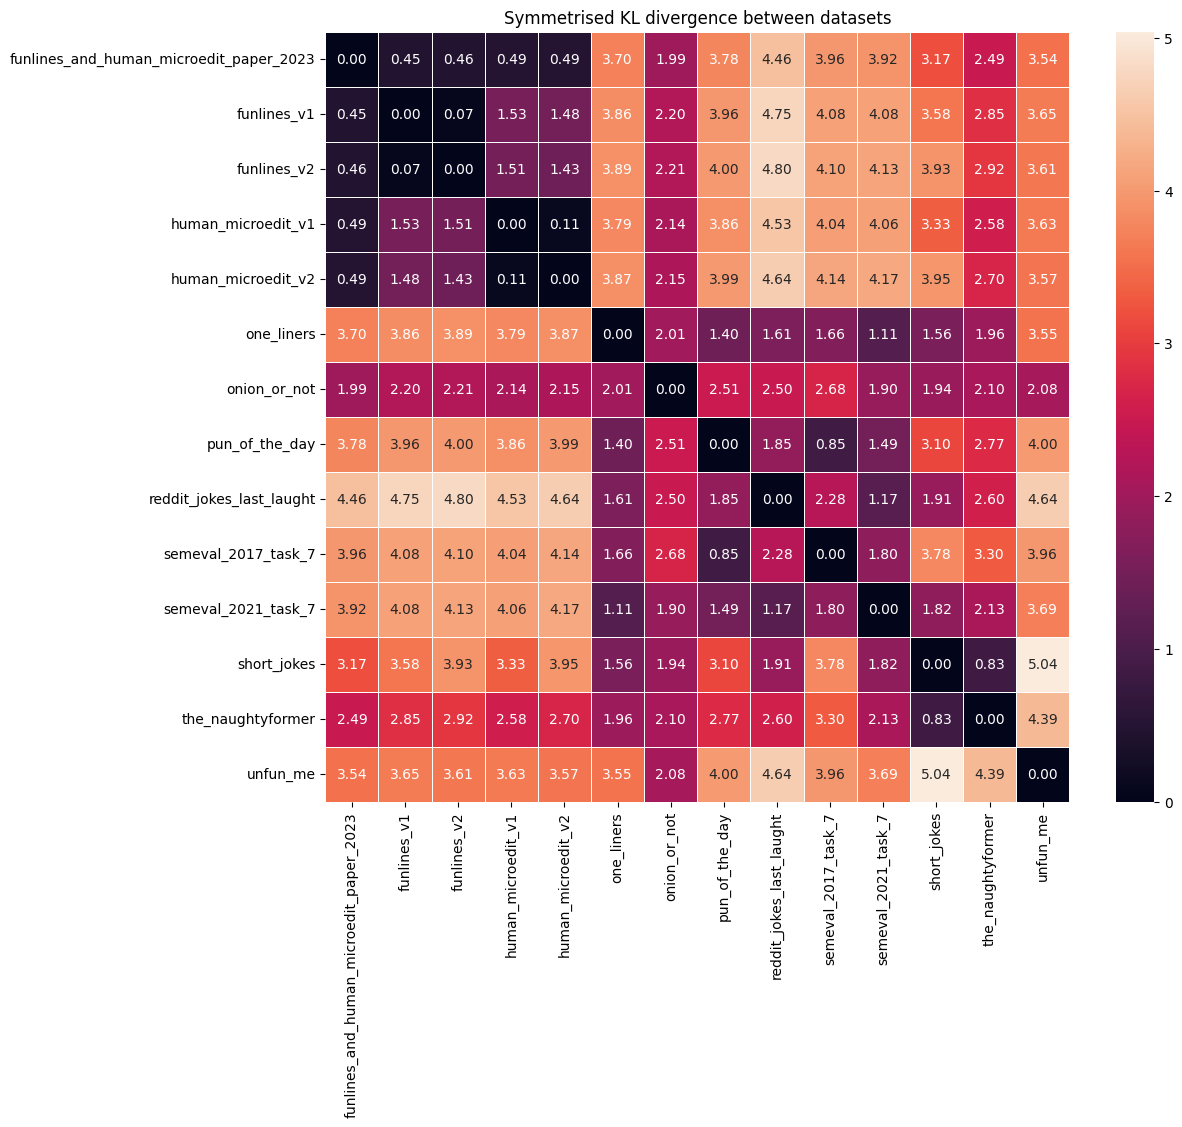

In [18]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_symmetrised_kl, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Symmetrised KL divergence between datasets')
plt.savefig('Symmetrised KL divergence between datasets.png')

# Show vocab size

In [19]:
for i in range(len(all_data)):
    print(f'{all_data[i].name} | vocab_size:{all_data[i].vocab_size} | non unique words: {all_data[i].non_unique_words}')

funlines_and_human_microedit_paper_2023 | vocab_size:16134 | non unique words: 266825
funlines_v1 | vocab_size:13160 | non unique words: 179302
funlines_v2 | vocab_size:11262 | non unique words: 107789
human_microedit_v1 | vocab_size:13596 | non unique words: 248561
human_microedit_v2 | vocab_size:10130 | non unique words: 98693
one_liners | vocab_size:27905 | non unique words: 338553
onion_or_not | vocab_size:27319 | non unique words: 298037
pun_of_the_day | vocab_size:7491 | non unique words: 65227
reddit_jokes_last_laught | vocab_size:38128 | non unique words: 1108446
semeval_2017_task_7 | vocab_size:7916 | non unique words: 43985
semeval_2021_task_7 | vocab_size:17163 | non unique words: 208819
unfun_me | vocab_size:6300 | non unique words: 33905
short_jokes | vocab_size:579276 | non unique words: 17708079
the_naughtyformer | vocab_size:111802 | non unique words: 9300620


In [12]:
for dh in all_data:
    print(dh.name, calc_divergence_between_target(copy.deepcopy(dh)))

funlines_and_human_microedit_paper_2023 0.3017531644171433
funlines_v1 0.267372441407745
funlines_v2 0.8793075544002895
human_microedit_v1 0.26494217866682124
human_microedit_v2 1.0468635495106073
one_liners 1.7094590022191658
onion_or_not 1.5566020970390424
pun_of_the_day 1.327409729032495
reddit_jokes_last_laught 0.9535245077553267
semeval_2017_task_7 2.289369003430039
semeval_2021_task_7 1.4900811009992587
unfun_me 0.5073552837953553


: 

: 

In [ ]:
all_data = list()
for name in SUPPORTED_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

for dh in all_data:
    print(calc_vocab_for_labels(dh))

pun_of_the_day
positive target 6803 32048 0.21227533699450823
negative target 3309 33179 0.09973175803972392

one_liners
positive target 16379 198043 0.08270426119580092
negative target 19215 140510 0.13675183260977866

reddit_jokes_last_laught
positive target 14935 774851 0.019274673453347806
negative target 31476 333595 0.09435393216325184

short_jokes
positive target 76167 4047431 0.018818603701953165
negative target 545320 13660648 0.03991904337188104

funlines_v1
positive target 12715 93629 0.13580194170609533
negative target 10420 85673 0.1216252494951735

human_microedit_v1
positive target 13489 168505 0.0800510370612148
negative target 9434 80056 0.11784251024283002

funlines_v2
positive target 5772 22116 0.2609875203472599
negative target 10420 85673 0.1216252494951735

human_microedit_v2
positive target 4767 18637 0.255781509899662
negative target 9434 80056 0.11784251024283002

unfun_me
positive target 4643 10934 0.42463874154014997
negative target 5841 22971 0.2542771320360